In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import datetime

In [2]:
# df = pd.read_csv(r"D:\Git\aa_project\Data\berlin_final.csv")
df = pd.read_csv(r"D:\OneDrive - Universität zu Köln\Uni\AA\Project\aa_project\Data\berlin_final.csv")
# df_w = pd.read_csv(r"D:\Git\aa_project\Data\berlin_weather.csv")
df_w = pd.read_csv(r"D:\OneDrive - Universität zu Köln\Uni\AA\Project\aa_project\Data\berlin_weather.csv")

In [3]:
df_w.head()

,Unnamed: 0,sid,datetime,temperature,precipitation,wind_speed
0,3600,433,2019-02-01 00:00:00,-1.6,0.0,2.8
1,3601,433,2019-02-01 01:00:00,-2.3,0.0,2.8
2,3602,433,2019-02-01 02:00:00,-2.7,0.0,3.1
3,3603,433,2019-02-01 03:00:00,-2.8,0.0,2.4
4,3604,433,2019-02-01 04:00:00,-3.4,0.0,3.3


In [4]:
df.head()

,Unnamed: 0,day,year,month,date,hour,min,weekday,weekday_str,b_number,city,trip_duration,distance,orig_lat,orig_lng,dest_lat,dest_lng
0,0,2019-02-16 14:53:00,2019,2,16,14,53,6,Saturday,13001,berlin,21,4.141,52.505076,13.414721,52.534591,13.452043
1,1,2019-02-16 17:22:00,2019,2,16,17,22,6,Saturday,13001,berlin,27,4.142,52.534591,13.452043,52.504621,13.415686
2,2,2019-02-16 23:29:00,2019,2,16,23,29,6,Saturday,13001,berlin,22,3.894,52.504621,13.415686,52.528998,13.456997
3,3,2019-02-18 17:49:00,2019,2,18,17,49,1,Monday,13001,berlin,15,1.855,52.528998,13.456997,52.536231,13.432285
4,4,2019-02-19 13:08:00,2019,2,19,13,8,2,Tuesday,13001,berlin,9,1.009,52.536231,13.432285,52.543311,13.441611


In [5]:
type(df_w["datetime"][0])

str

In [6]:
df_w.datetime = pd.to_datetime(df_w.datetime)

In [7]:
type(df_w["datetime"][0])

pandas._libs.tslibs.timestamps.Timestamp

In [8]:
df[(df["month"] == 2) & (df["date"] == 1) & (df["hour"] == 2)].size

34

In [9]:
def get_trips(datetime):
    return df[(df["month"] == datetime.month) & (df["date"] == datetime.day) & (df["hour"] == datetime.hour)].size

In [10]:
df_w["num_trips"] = df_w["datetime"].apply(get_trips)

In [11]:
df_w.head()

,Unnamed: 0,sid,datetime,temperature,precipitation,wind_speed,num_trips
0,3600,433,2019-02-01 00:00:00,-1.6,0.0,2.8,187
1,3601,433,2019-02-01 01:00:00,-2.3,0.0,2.8,68
2,3602,433,2019-02-01 02:00:00,-2.7,0.0,3.1,34
3,3603,433,2019-02-01 03:00:00,-2.8,0.0,2.4,17
4,3604,433,2019-02-01 04:00:00,-3.4,0.0,3.3,17


In [12]:
def get_distance(datetime):
    sum = 0
    df_distance = df[(df["month"] == datetime.month) & (df["date"] == datetime.day) & (df["hour"] == datetime.hour)]
    for distance in df_distance["distance"]:
        sum = sum + distance
    return sum

In [13]:
sum = 0
df_distance = df[(df["month"] == 2) & (df["date"] == 1) & (df["hour"] == 1)]
for distance in df_distance["distance"]:
    sum = sum + distance
print(sum)

13.458


In [14]:
df_w["distance"] = df_w["datetime"].apply(get_distance)

In [15]:
def get_duration(datetime):
    sum = 0
    df_duration = df[(df["month"] == datetime.month) & (df["date"] == datetime.day) & (df["hour"] == datetime.hour)]
    for duration in df_duration["trip_duration"]:
        sum = sum + duration
    return sum

In [16]:
df_w["duration"] = df_w["datetime"].apply(get_duration)

In [17]:
# pd.set_option("display.max_rows", None)
# pd.set_option('display.max_columns', None)
print(df_w)

      Unnamed: 0  sid            datetime  temperature  precipitation  \
0           3600  433 2019-02-01 00:00:00         -1.6            0.0   
1           3601  433 2019-02-01 01:00:00         -2.3            0.0   
2           3602  433 2019-02-01 02:00:00         -2.7            0.0   
3           3603  433 2019-02-01 03:00:00         -2.8            0.0   
4           3604  433 2019-02-01 04:00:00         -3.4            0.0   
...          ...  ...                 ...          ...            ...   
3595        7195  433 2019-06-30 19:00:00         34.1            0.0   
3596        7196  433 2019-06-30 20:00:00         30.1            0.0   
3597        7197  433 2019-06-30 21:00:00         27.8            0.0   
3598        7198  433 2019-06-30 22:00:00         25.8            0.0   
3599        7199  433 2019-06-30 23:00:00         24.2            0.0   

      wind_speed  num_trips  distance  duration  
0            2.8        187    19.429       161  
1            2.8       

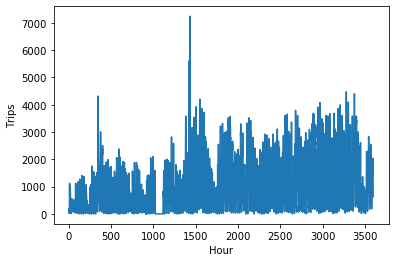

In [18]:
data_w = pd.DataFrame()
data_w['num_trips'] = df_w.num_trips.astype(int)
data_w.sort_index(inplace=True)
plt.plot(data_w.index, data_w.num_trips, label='Trips per hour')
plt.ylabel('Trips')
plt.xlabel('Hour')
plt.show()

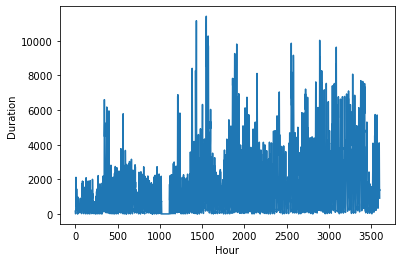

In [19]:
data_w = pd.DataFrame()
data_w['duration'] = df_w.duration
data_w.sort_index(inplace=True)
plt.plot(data_w.index, data_w.duration, label='Trips per hour')
plt.ylabel('Duration')
plt.xlabel('Hour')
plt.show()

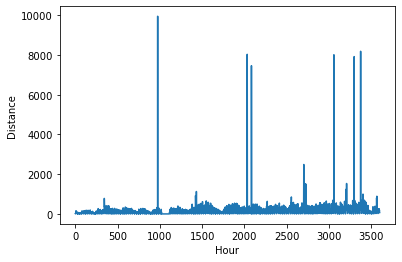

In [20]:
data_w = pd.DataFrame()
data_w['distance'] = df_w.distance
data_w.sort_index(inplace=True)
plt.plot(data_w.index, data_w.distance, label='Trips per hour')
plt.ylabel('Distance')
plt.xlabel('Hour')
plt.show()